<a href="https://colab.research.google.com/github/originalscottyd/CSC302_DataVisualization/blob/main/HW3_ScottDavidson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please see examples we did in class. Questions are just variations of what we did earlier. 

**Q1**. Please read WorldCupMatches.csv to a data frame to proceed

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
df.head()


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


**Q2** Using seaborn's displot draw density curves to show the distributions of Home Team Goals for every year. 

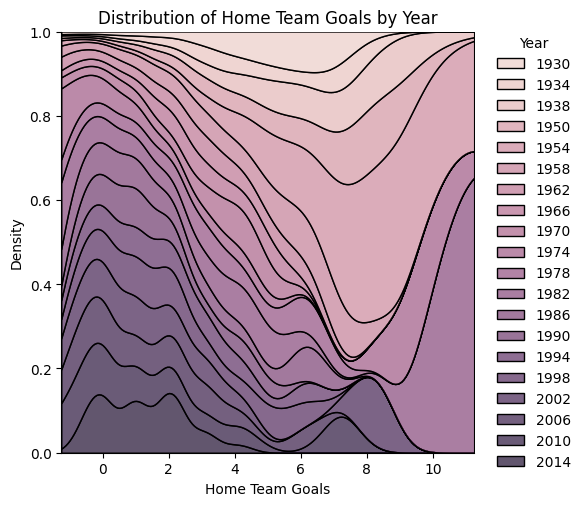

In [3]:
# Use only the "Year" and "Home Team Goals" columns from the dataset
Year_HomeGoals = df[['Year', 'Home Team Goals']]
# Use displot draw density curves to show the distributions of Home Team Goals for every year
sns.displot(data=Year_HomeGoals, x='Home Team Goals', hue='Year', kind='kde', multiple='fill', fill=True)
# Plot title and labels
plt.title('Distribution of Home Team Goals by Year')
plt.xlabel('Home Team Goals')
plt.ylabel('Density')
plt.show()

**Q3** Draw violin plots to summarize Home Team Goals distributions for each year by using seaborn. Notice that labels are really cluttered. Then please refer to the earlier notebooks to have labels to appear on only select years which end with 0. You can use ax handle to call ax.set_xticklables(labels) for the labels your prepared.

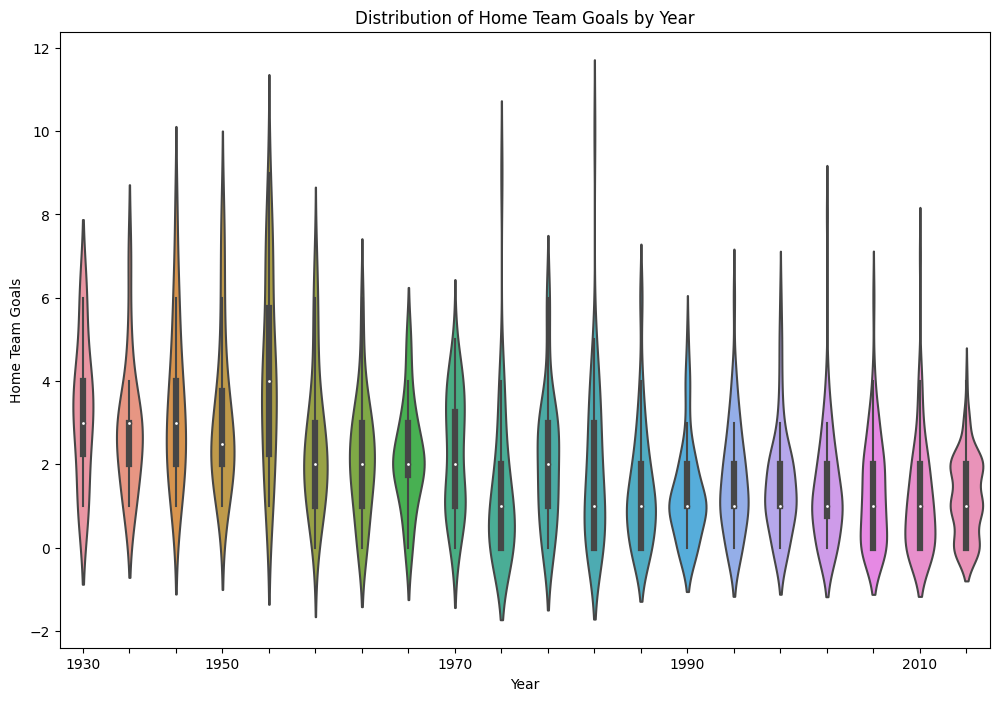

In [4]:
# Create a violin plot 
# Should I have set cut=0 to avoid showing negative goals?
fig, ax = plt.subplots(figsize=(12,8))
sns.violinplot(x='Year', y='Home Team Goals', data=df)
# Have labels appear on only select years which end with 0
labels=[x if x%10==0 else None for x in list(df.Year.unique())]
ax.set_xticklabels(labels)
plt.title('Distribution of Home Team Goals by Year')
plt.xlabel('Year')
plt.ylabel('Home Team Goals')
plt.show()

**Q4** Please install joypy. Then visualize distributions for Home Team Goals and Away Team Goals' for each year. Once you visualize, please add  plt.style.use('seaborn-white') to see how colors change in your second run. Please also add the legend which you can find from the function prototype.



In [5]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install colorspacious

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<ipython-input-7-9c13f65c3e9b>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


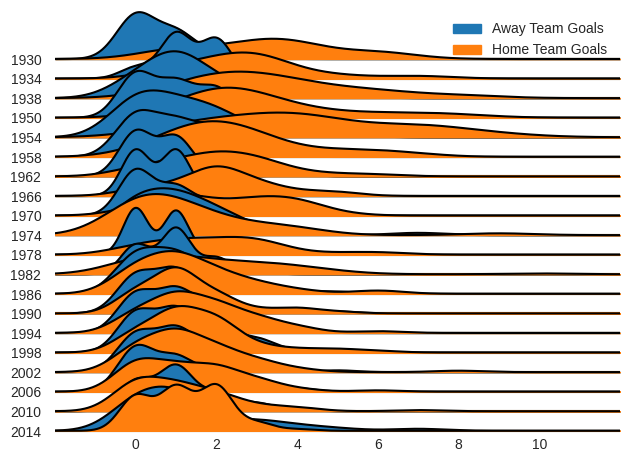

In [7]:
import joypy as jp
from colorspacious import cspace_converter
from matplotlib import cm
print(plt.style.available)
plt.style.use('seaborn-white')
jp.joyplot(data=df, column=['Away Team Goals', 'Home Team Goals'], by='Year', legend=True, ylim='own') #ylim='own'
plt.show()


**Q5** Please use groupby function on Home Team Initials to see the sum of Home Team Goals which can be saved to another data frame by adding .reset_index() end the end of your line. 

Then use your new data frame to visualize those total Home Team Goals for your top 5 countries with a bar plot (You can use Home Team Initials). You can use use df.sort_values() function on your data frame by tweaking the ascending option.

Notice that your x-axis will be having country initials, and y-axis will show the total number of Home Team Goals. 



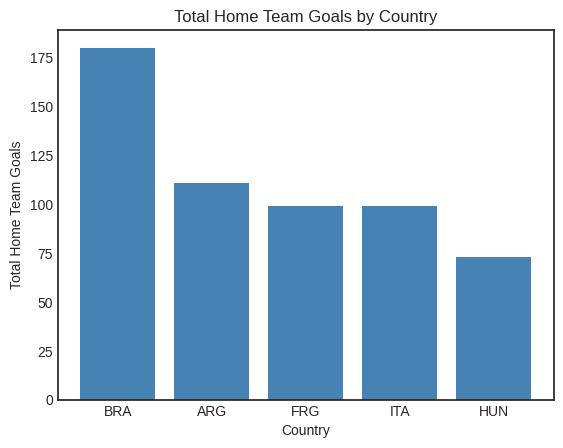

In [8]:
# Use groupby function on Home Team Initials to get the sum of Home Team Goals, 
# create new df by adding reset index to end of line.
home_team_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort the DataFrame in descending order by Home Team Goals and select the top 5 countries,
# You can use use df.sort_values() function on your data frame by tweaking the ascending option.
top_countries = home_team_goals.sort_values('Home Team Goals', ascending=False).head()

# Visualize the total Home Team Goals for the top 5 countries using a bar plot
plt.bar(top_countries['Home Team Initials'], top_countries['Home Team Goals'], color='steelblue')
plt.xlabel('Country')
plt.ylabel('Total Home Team Goals')
plt.title('Total Home Team Goals by Country')
plt.show()

**Q6** Please extract the rows for your top 4 countries (Home Team Initials') with the help of the previous question's answer. Then use joyplot again to visualize densities for 'Home Team Goals' and	'Away Team Goals' on the horizantal axis. Notice that your y-axis labels will be your country initials (Home Team Initials'). Make sure that your legend is visible and use 'dark_background' by calling plt.style.use again.



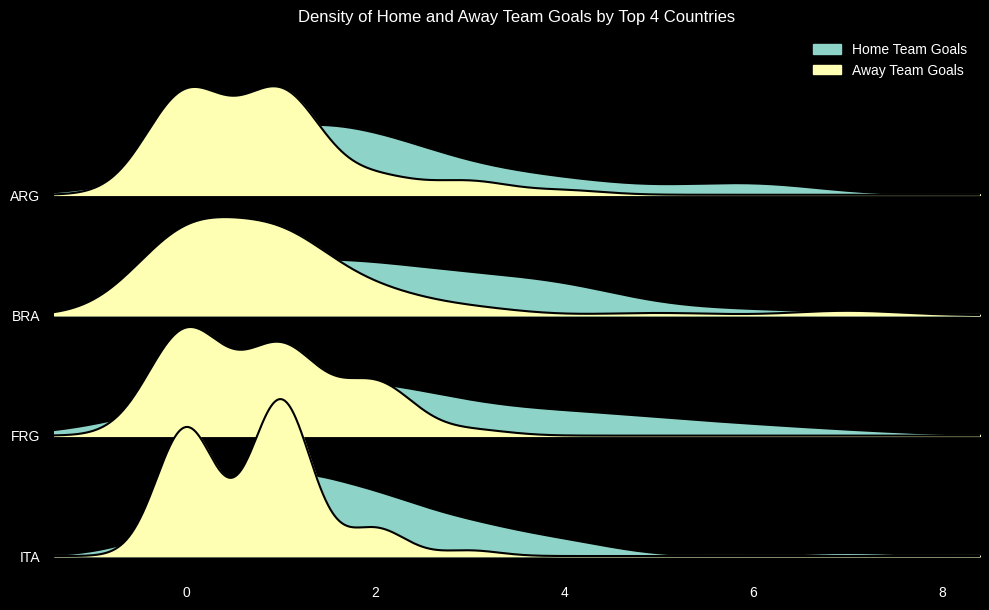

In [10]:
# Copied over from Q5, Group the data frame by 'Home Team Initials' to get the sum of 'Home Team Goals'
home_team_goals = df.groupby('Home Team Initials')['Home Team Goals'].sum().reset_index()

# Sort the data frame in descending order by 'Home Team Goals' and select the top 4 countries
top_countries = home_team_goals.sort_values('Home Team Goals', ascending=False).head(4)

# Extract the top 4 countries (Home Team Initials)
filtered_df = df[df['Home Team Initials'].isin(top_countries['Home Team Initials'])]

# Use joyplot to visualize densities for "Home Team Goals' and 'Away Team Goals' on horizontal axis
fig, axes = jp.joyplot(filtered_df, 
                       by='Home Team Initials', 
                       column=['Home Team Goals', 'Away Team Goals'],
                       legend='True', 
                       figsize=(10, 6))
# Add the country initials as y-axis labels
# I struggled getting this section to work 
axes[-1].set_yticks(range(len(top_countries.columns)))
axes[-1].set_yticklabels(top_countries.columns)
# Set the plot style to 'dark_background'
plt.style.use('dark_background')
plt.title('Density of Home and Away Team Goals by Top 4 Countries')
plt.show()

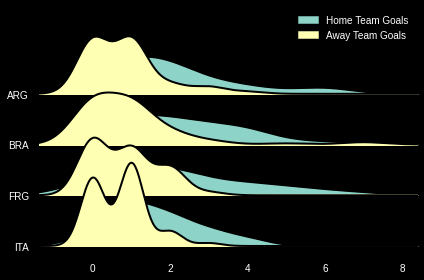

**Q7** Please install seaborn_qqplot as shown below. Then draw a qqplot to compare probability distributions of Home Team Goals and Away Team Goals. Please comment on your finding. Do you think their distributions agree with each other? Please justify your answer by explaining the figure you obtained.

In [11]:
!pip install seaborn_qqplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'Probability Distributions of Home Team Goals and Away Team Goals')

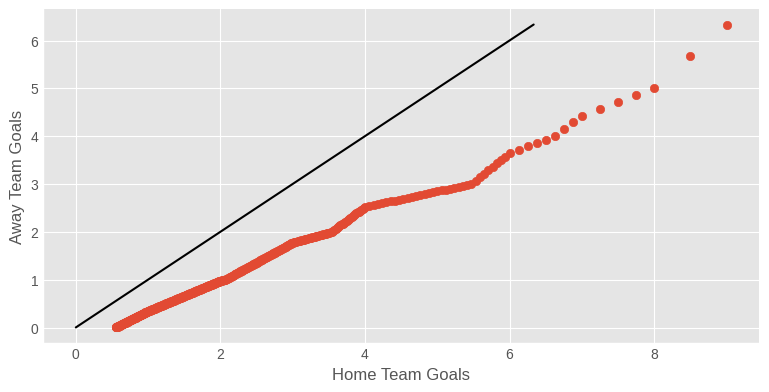

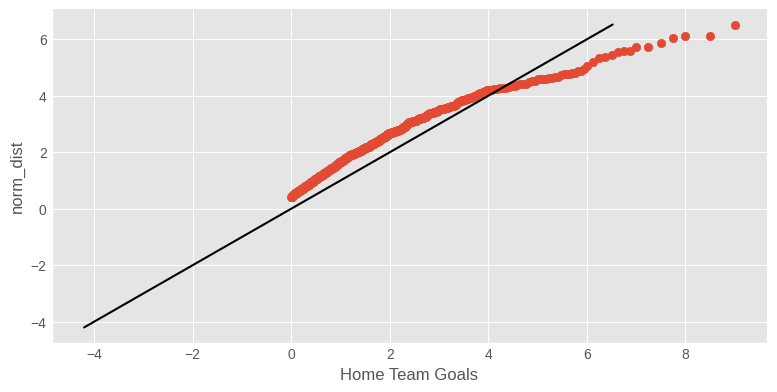

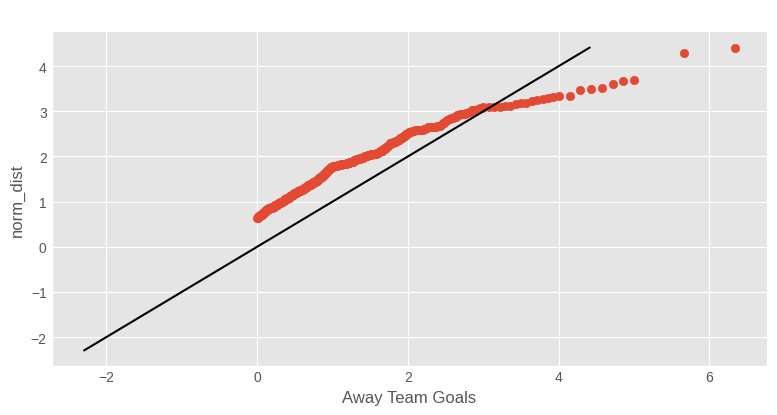

In [12]:
from seaborn_qqplot import pplot #seaborn-qqplot is a seaborn extension adding qqplots.
from scipy.stats import norm
plt.style.use('ggplot') #this is to change the color theme.
pplot(df, x='Home Team Goals', y='Away Team Goals', kind='qq', display_kws={"identity":True}, height=4, aspect=2)
pplot(df, x='Home Team Goals', y=norm, kind='qq', display_kws={"identity":True}, height=4, aspect=2)
pplot(df, x='Away Team Goals', y=norm, kind='qq', display_kws={"identity":True}, height=4, aspect=2)
plt.title('Probability Distributions of Home Team Goals and Away Team Goals') 

The probability distributions for Home Team Games and Away Team Games are somewhat similar. I would say that they generally agree with each other, but tend to drift farther away from the reference line as the number of goals climbs. 